In [1]:
# https://www.datacamp.com/community/tutorials/recommender-systems-python
# https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system
# As described in the previous section, simple recommenders are basic systems that recommends the top items based on a certain metric or score. In this section, 
# you will build a simplified clone of IMDB Top 250 Movies using metadata collected from IMDB.

In [2]:
#  Zero Knowledge of what you like or not

In [3]:
# Recommendation based on their polularity: a) How many people voted?  b) what is the vote score?

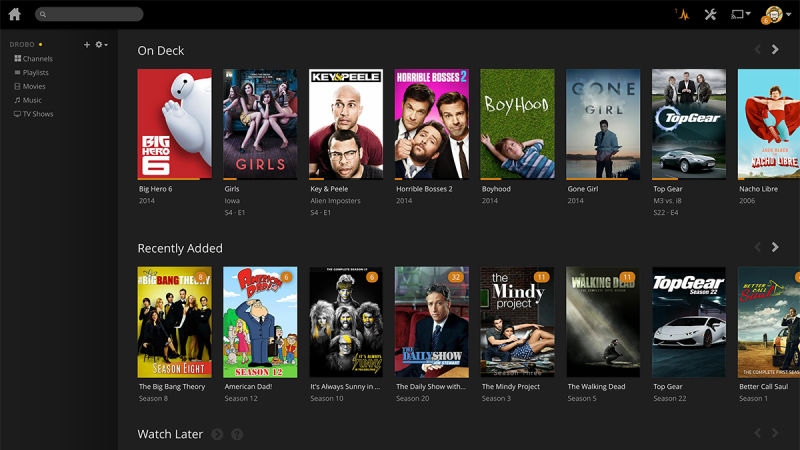

In [4]:
from IPython.display import Image
Image("./movies.jpg")

In [5]:
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# Import Pandas
import pandas as pd

# Load Movies Metadata
metadata = pd.read_csv('./data/the-movies-dataset/movies_metadata.csv', low_memory=False)

In [7]:
pop= metadata.sort_values('popularity', ascending=False)

In [8]:
pop[['title','popularity']].head(100)

,title,popularity
30700,Minions,547.488298
33356,Wonder Woman,294.337037
42221,Beauty and the Beast,287.253654
43643,Baby Driver,228.032744
24455,Big Hero 6,213.849907
26564,Deadpool,187.860492
26566,Guardians of the Galaxy Vol. 2,185.330992
14551,Avatar,185.070892
24351,John Wick,183.870374
23675,Gone Girl,154.801009


Text(0.5,1,'Popular Movies')

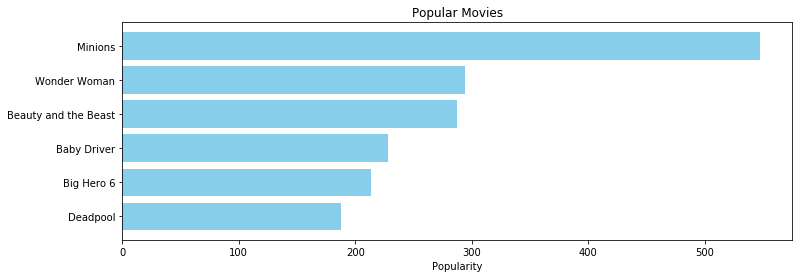

In [9]:
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Some Features:

    budget - The budget in which the movie was made.
    genre - The genre of the movie, Action, Comedy ,Thriller etc.
    homepage - A link to the homepage of the movie.
    id - This is infact the movie_id as in the first dataset.
    keywords - The keywords or tags related to the movie.
    original_language - The language in which the movie was made.
    original_title - The title of the movie before translation or adaptation.
    overview - A brief description of the movie.
    popularity - A numeric quantity specifying the movie popularity.
    production_companies - The production house of the movie.
    production_countries - The country in which it was produced.
    release_date - The date on which it was released.
    revenue - The worldwide revenue generated by the movie.
    runtime - The running time of the movie in minutes.
    status - "Released" or "Rumored".
    tagline - Movie's tagline.
    title - Title of the movie.
    vote_average - average ratings the movie recieved.
    vote_count - the count of votes recieved.


In [10]:
metadata.shape

(45465, 24)

In [11]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [12]:
# Print the first three rows
metadata.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [13]:
metadata['vote_average'].head(5)

0    7.7
1    6.9
2    6.5
3    6.1
4    5.7
Name: vote_average, dtype: float64

In [14]:
# Calculate C
C = metadata['vote_average'].mean()
print(C)

5.618178218692651


In [15]:
# The average rating of a movie on IMDB is around 5.6, on a scale of 10.

In [16]:
metadata['vote_count'].head(5)

0    5415.0
1    2413.0
2      92.0
3      34.0
4     173.0
Name: vote_count, dtype: float64

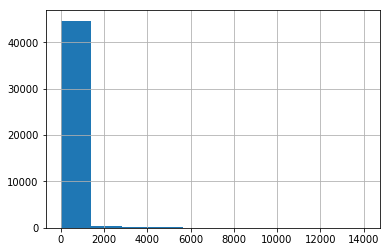

In [17]:
metadata['vote_count'].hist()

In [18]:
# Calculate the minimum number of votes required to be in the chart, m
# Filter out those movies not popular at all (no body voted them)
m = metadata['vote_count'].quantile(0.90)
print(m)

160.0


In [19]:
# Filter out all qualified movies into a new DataFrame
q_movies = metadata.copy().loc[metadata['vote_count'] >= m]
q_movies.shape

(4555, 24)

In [20]:
q_movies.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,1995-11-17,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0
11,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,...,1995-12-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0
12,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,...,1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0
15,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,1995-11-22,116112375.0,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0


In [21]:
m, C

(160.0, 5.618178218692651)

In [22]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [23]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [24]:
q_movies['score'].head(50)

0      7.640253
1      6.820291
4      5.660686
5      7.537199
8      5.556612
9      6.483980
10     6.106988
11     5.664618
12     6.693325
15     7.567737
16     6.717001
17     6.298152
18     6.040146
19     5.490908
20     6.130986
21     6.106988
22     5.889727
24     6.648397
28     6.922454
30     6.094153
31     7.291600
33     5.933306
35     6.772370
38     6.692418
43     5.457040
44     6.186375
46     8.034635
47     6.596290
49     7.986350
57     6.670113
62     5.935536
68     6.671484
69     6.786313
88     5.879739
93     5.678851
95     7.472992
99     6.375075
102    6.347798
103    6.816891
108    7.606540
109    7.957775
110    6.151626
121    7.007356
139    6.326152
142    6.425309
144    6.799539
147    7.150255
150    5.239614
151    6.466899
155    5.949302
Name: score, dtype: float64

In [25]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425438
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421448
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256384
292,Pulp Fiction,8670.0,8.3,8.251405
522,Schindler's List,4436.0,8.3,8.206638
23673,Whiplash,4376.0,8.3,8.205403
5481,Spirited Away,3968.0,8.3,8.196053
2211,Life Is Beautiful,3643.0,8.3,8.187170
